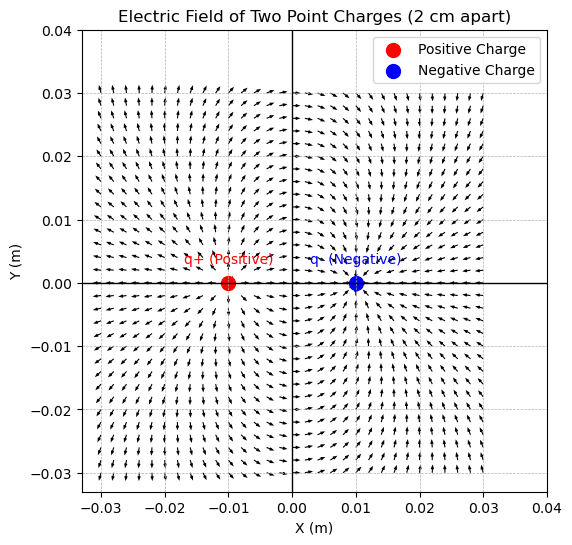

In [11]:
import numpy as np
import matplotlib.pyplot as plt


# Constants
k_e = 8.99e9  # Coulomb's constant in N·m²/C²
q_positive = 1e-9  # Positive charge in Coulombs (1 nC)
q_negative = -1e-9  # Negative charge in Coulombs (-1 nC)
distance = 0.02  # Distance between charges in meters (2 cm)
grid_spacing = 0.002  # Grid spacing in meters (2 mm)
grid_range = 0.03  # Plot range in meters (±3 cm)

# Define charge positions
charge_positions = np.array([[-distance / 2, 0], [distance / 2, 0]])

# Create a grid of points
x, y = np.meshgrid(
    np.arange(-grid_range, grid_range + grid_spacing, grid_spacing),
    np.arange(-grid_range, grid_range + grid_spacing, grid_spacing)
)
ex = np.zeros_like(x)
ey = np.zeros_like(y)

# Compute the electric field at each grid point
def compute_e_field(px, py):
    """ Compute the electric field at a given point (px, py). """
    ex_field, ey_field = 0, 0
    for idx, charge_pos in enumerate(charge_positions):
        charge = q_positive if idx == 0 else q_negative
        r_vec = np.array([px - charge_pos[0], py - charge_pos[1]])
        r_mag = np.linalg.norm(r_vec)
        if r_mag != 0:  # Avoid division by zero
            e_field = k_e * charge / r_mag**2
            r_hat = r_vec / r_mag  # Unit vector
            ex_field += e_field * r_hat[0]
            ey_field += e_field * r_hat[1]
    return ex_field, ey_field, np.sqrt(ex_field**2 + ey_field**2)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        ex[i, j], ey[i, j], _ = compute_e_field(x[i, j], y[i, j])

# Normalize vectors for visualization
e_magnitude = np.sqrt(ex**2 + ey**2)
ex /= e_magnitude
ey /= e_magnitude

# Create plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.quiver(x, y, ex, ey, color='black', headwidth=3, headlength=4)  # Black vectors

# Plot charge positions
ax.scatter(charge_positions[0, 0], charge_positions[0, 1], color='red', s=100, label="Positive Charge")   # Red for positive
ax.scatter(charge_positions[1, 0], charge_positions[1, 1], color='blue', s=100, label="Negative Charge")   # Blue for negative

# Mark charges
ax.text(charge_positions[0, 0], charge_positions[0, 1] + 0.003, 'q+ (Positive)', color='red', ha='center')
ax.text(charge_positions[1, 0], charge_positions[1, 1] + 0.003, 'q- (Negative)', color='blue', ha='center')

# Labels and title
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_title("Electric Field of Two Point Charges (2 cm apart)")

# Set tick spacing to 1 cm = 0.01 m
ax.set_xticks(np.arange(-grid_range, grid_range + 0.01, 0.01))
ax.set_yticks(np.arange(-grid_range, grid_range + 0.01, 0.01))
ax.grid(True, linestyle='--', linewidth=0.5)

ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.legend()

# Function to handle mouse clicks
def on_click(event):
    if event.xdata is not None and event.ydata is not None:  # Ensure click is inside plot
        px, py = event.xdata, event.ydata
        ex, ey, e_mag = compute_e_field(px, py)
        print(f"Point selected: ({px*100:.1f} cm, {py*100:.1f} cm)")
        print(f"Electric Field: Ex = {ex:.2e} N/C, Ey = {ey:.2e} N/C, |E| = {e_mag:.2e} N/C")

# Connect the click event to the function
fig.canvas.mpl_connect("button_press_event", on_click)

plt.show()
